# Example Usage

In [1]:
import chalc as ch
import numpy as np
import matplotlib.pyplot as plt

For our data we sample 100 points on a circle with some noise and 100 points from inside the unit disk.

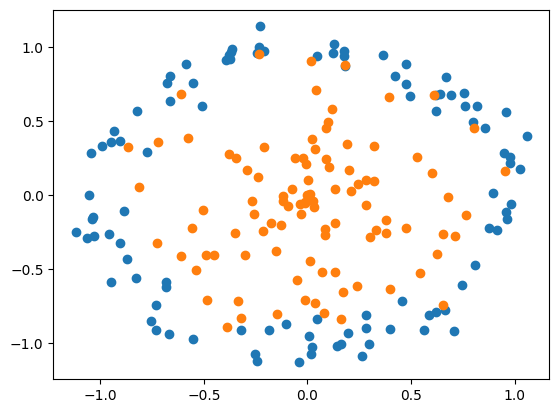

In [2]:
np.random.seed(40)
num_points = 100
mean = [0, 0]
cov = np.eye(2)*0.01
x = np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T +\
    np.random.default_rng().multivariate_normal(mean, cov, num_points).T # points as columns
y = np.random.rand(num_points) * np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T
plt.scatter(x[0, :], x[1, :])
plt.scatter(y[0, :], y[1, :])

We compute the chromatic alpha complex of the point cloud:

In [3]:
colours = [0]*100 + [1]*100
points = np.concatenate((x,y), axis=1)
K = ch.chromatic.alpha(points, colours)

$K$ has far fewer simplices than either the Cech or Vietoris-Rips complex, which each have $\displaystyle \binom{200}{2} = 19900$ edges and $\displaystyle \binom{200}{3} = 1313400$ 2-simplices. 

In [4]:
print(f'{len(K.simplices[1])} 1-simplices')
print(f'{len(K.simplices[2])} 2-simplices')

941 1-simplices
1286 2-simplices


Washboard server:

In [6]:
dgms, entrance_times, dimensions = ch.sixpack.compute(points, colours, k=1)
truncation = truncation = max(entrance_times) * 1.01
dgms

{'__name__': 'phimaker.phimaker',
 '__doc__': 'A Python module implemented in Rust.',
 '__package__': 'phimaker',
 '__loader__': <_frozen_importlib_external.ExtensionFileLoader at 0x15578ce3410>,
 '__spec__': ModuleSpec(name='phimaker.phimaker', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x0000015578CE3410>, origin='c:\\Users\\Abhinav\\miniforge3\\envs\\Chalc\\Lib\\site-packages\\phimaker\\phimaker.cp311-win_amd64.pyd'),
 '__all__': ['compute_ensemble', 'compute_ensemble_cylinder', 'zero_overlap'],
 'compute_ensemble': <function phimaker.phimaker.compute_ensemble(matrix, num_threads=Ellipsis, slow=Ellipsis)>,
 'compute_ensemble_cylinder': <function phimaker.phimaker.compute_ensemble_cylinder(domain_matrix, codomain_matrix, map, num_threads=Ellipsis)>,
 'zero_overlap': <function phimaker.phimaker.zero_overlap(matrix)>,
 '__file__': 'c:\\Users\\Abhinav\\miniforge3\\envs\\Chalc\\Lib\\site-packages\\phimaker\\phimaker.cp311-win_amd64.pyd'}